In [30]:
# Name: André Moreira Souza
# NUSP: 9778985
# Course Code: SCC0251
# Semester: 2019/1
# Assignment: 1 - Image Generation

In [31]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import random
from math import sin, cos

In [64]:
# Function definitions
# Each function returns an scene image (numpy array)

# f (x, y) = (xy + 2y)
def f1 (C, Q, N, S):
	img = np.zeros((C, C), dtype=float)
	for x in range(C):
		for y in range(C):
			img[x][y] = float(x*y+2.0*y)
	return img

# f (x, y) = | cos(x/Q) + 2 sin(y/Q)|
def f2 (C, Q, N, S):
	img = np.zeros((C, C), dtype=float)
	for x in range(C):
		for y in range(C):
			img[x][y] = abs(float(np.cos(x/Q) + 2.0*np.sin(y/Q)))
	return img

# f (x, y) = |3(x/Q) − cbrt(y/Q)|
def f3 (C, Q, N, S):
	img = np.zeros((C, C), dtype=float)
	for x in range(C):
		for y in range(C):
			img[x][y] = abs(float(3.0*(x/Q) - np.cbrt(y/Q)))
	return img

# f (x, y) = rand(0, 1, S)
def f4 (C, Q, N, S):
	img = np.zeros((C, C), dtype=float)
	random.seed(S)
	for x in range(C):
		for y in range(C):
			img[x][y] = float(random.random())
	return img

# f (x, y) = randomwalk(S)
def f5 (C, Q, N, S):
	img = np.zeros((C, C), dtype=float)
	x, y = 0, 0
	img[x][y] = 1.0
	random.seed(S)
	for i in range((1+(C*C))):
		x = (x + random.randint(-1, 1)) % C
		y = (y + random.randint(-1, 1)) % C
		img[x][y] = 1.0
	return img

# Normalize value of an numpy array between 0 and a given max value
def normalize (arr, maxvalue):
	return (arr-arr.min()) * (maxvalue / (arr.max()-arr.min()))

# Digitize scene image, using downsampling and quantizing
def digitize (scene, N, B):
	# Generating steps from downsampling pooling operator
	step = scene.shape[0] // N
	g = np.zeros((N, N), dtype=float)
	for i in range(N):
		for j in range(N):
			g[i][j] = scene[step*i][step*j]

	# Quantizing
	g = np.round(normalize(g, 255)).astype(np.uint8)
	return g >> 8-B

# root mean squared error (RMSE) function
def rmse (img_g, img_r):
	return np.sum((img_g.astype(float) - img_r.astype(float))**2)**(1/2)

In [52]:
###### Inputs
    # filename = path to input image
    # C => lateral size of scene image
    # F => function to be used
    # Q => parameter for some functions
    # N => lateral size of digital image
    # B => bits per pixel
    # S => seed for random functions
filename = str(input()).strip()
C, F, Q, N, B, S = int(input()), int(input()), int(input()), int(input()), int(input()), int(input())

In [65]:
# Generating scene image f, defined on input parameters
f = {
    1: f1,
    2: f2,
    3: f3,
    4: f4,
    5: f5
}[F](C, Q, N, S)
f = normalize(f, 65535.0)

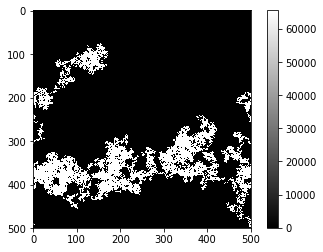

In [66]:
plt.imshow(f, cmap='gray')
plt.colorbar()

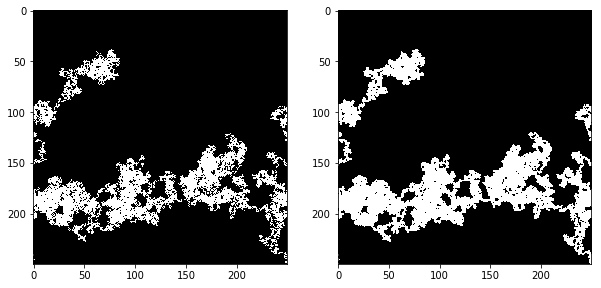

In [67]:
# Generating digital image g, defined by input parameters. Comparing with reference
g = digitize(f, N, B)
R = np.load(filename)
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(g, cmap='gray')
plt.subplot(122)
plt.imshow(R, cmap='gray')

In [68]:
# Error value
print('%.4lf' % rmse(g, R))

13871.1562
